In [2]:
%matplotlib inline

import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import subprocess

In [4]:
def plot_evolution(q_pairs, pi1, pi2, lambdas):
    colors = plt.cm.gnuplot(np.linspace(0,0.95,len(q_pairs)))
    fig, ax = plt.subplots(1,4,figsize=(11.4,4.8))
    for (q1,q2),color in zip(q_pairs,colors):
        fs = [[],[],[]]
        for l in lambdas:
            subprocess.call(f'python f0poly_sols_clean.py {pi1} {pi2} {q1} {q2} {l} > sols.dat', shell=True)
            with open('sols.dat', 'r') as file:
                sols = [float(f) for f in file.readline().split()]
            for i in range(3):
                fs[i].append(sols[i])
        ax[0].plot(lambdas, fs[0], lw=0.7, marker=None, color=color, label=f'({q1}, {q2})')
        ax[1].plot(lambdas, fs[1], lw=0.7, marker=None, color=color)
        ax[2].plot(lambdas, fs[2], lw=0.7, marker=None, color=color)
        cons = np.array(fs[2]-2*np.array(fs[1]))
        ax[3].plot(lambdas, cons, lw=0.7, marker=None, color=color)
    ax[0].set(xlabel='$\lambda$', ylabel='$f_0$')
    ax[1].set(xlabel='$\lambda$', ylabel='$f_1$')
    ax[2].set(xlabel='$\lambda$', ylabel='$f_2$')
    ax[3].set(xlabel='$\lambda$', ylabel='$Q$')
    fig.legend(title='$(q_1, q_2)$', fontsize=8, title_fontsize=8, loc=(0.32, 0.16))
    fig.tight_layout(pad=0.1)

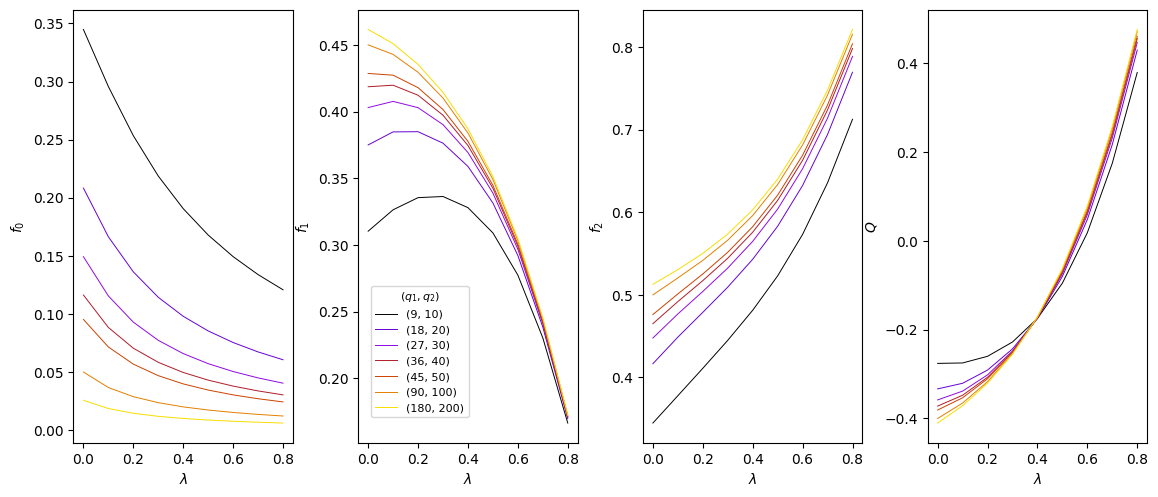

In [28]:
pi1, pi2 = 0.1, 0.1
q_pairs = [(9,10), (18,20), (27,30), (36,40), (45,50), (90,100), (180,200)]
lambdas = np.arange(0.0,0.9,0.1)

plot_evolution(q_pairs, pi1, pi2, lambdas)

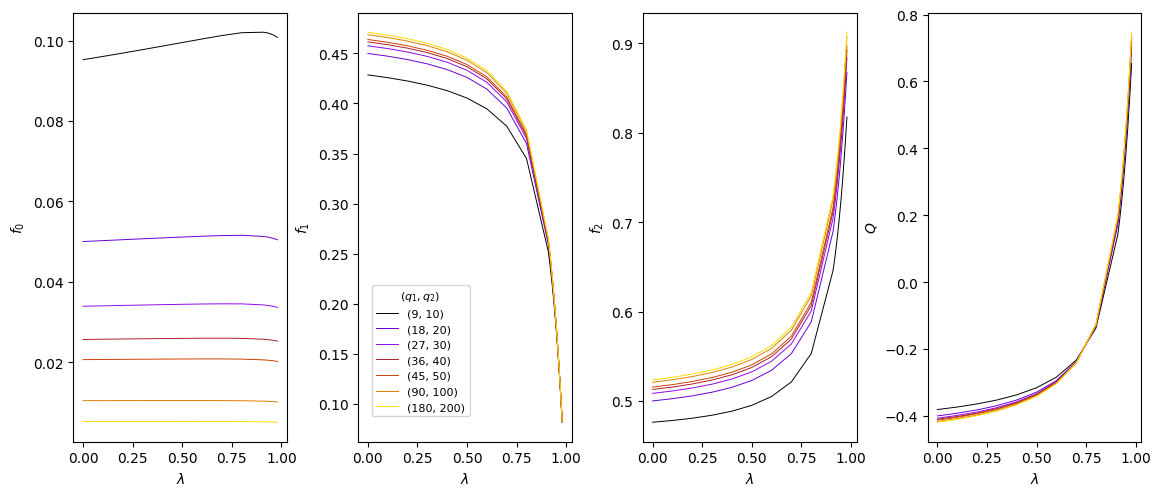

In [25]:
pi1, pi2 = 0.5, 0.5
q_pairs = [(9,10), (18,20), (27,30), (36,40), (45,50), (90,100), (180,200)]
lambdas = np.arange(0.0,0.9,0.1) 
lambdas = np.concatenate([lambdas, np.arange(0.91,0.99,0.01)])

plot_evolution(q_pairs, pi1, pi2, lambdas)

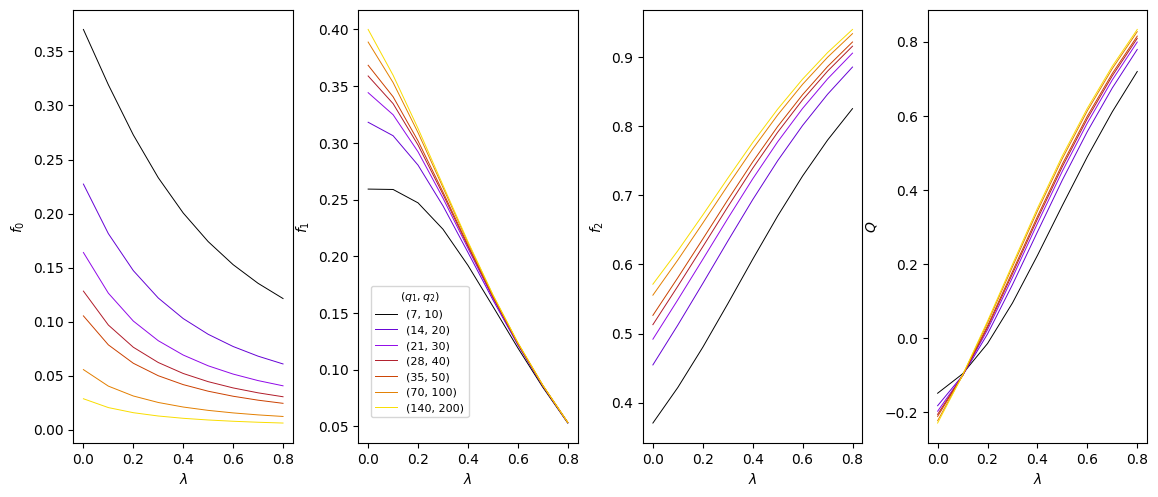

In [5]:
pi1, pi2 = 0.1, 0.1
q_pairs = [(7,10), (14,20), (21,30), (28,40), (35,50), (70,100), (140,200)]
lambdas = np.arange(0.0,0.9,0.1)

plot_evolution(q_pairs, pi1, pi2, lambdas)